<a href="https://colab.research.google.com/github/raushan9jnv/Car-Dekho-Price-Pridication/blob/main/Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [195]:
#importing the libraries
import numpy as np
from numpy import math
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
#path of file
path= '/content/drive/MyDrive/Almabetter/Machine Learing/Self project-Car Dekho/CAR DETAILS FROM CAR DEKHO.csv'

In [198]:
#importing the dataset
df= pd.read_csv(path)

### Data Insecption

In [199]:
#First Look
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [200]:
#dimensions of data
df.shape

(4340, 8)

In [201]:
#look into data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [202]:
#sataticial summary
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [203]:
#Include all summary
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [204]:
#Check duplicated values
df.duplicated().sum()

763

In [205]:
#Duplicated Rows
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [206]:
#drop duplicated values
df.drop_duplicates(inplace=True)

In [207]:
#duplicate values removed successfully
df.duplicated().sum()

0

In [208]:
#no null values
df.isnull().sum().sum()

0

### Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


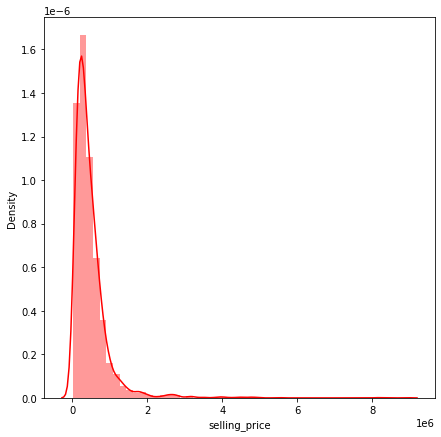

In [209]:
#dependent variable selling_price
plt.figure(figsize=(7,7))
sns.distplot(df['selling_price'],color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


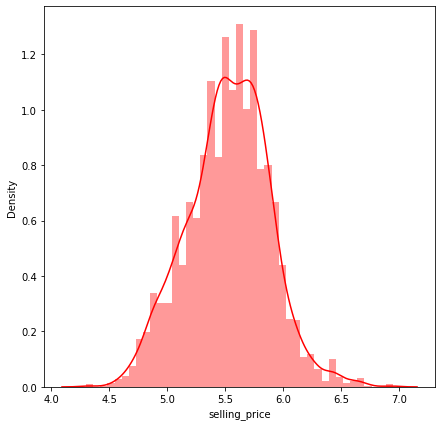

In [210]:
 #dependent variable selling_price log transformation
 plt.figure(figsize=(7,7))
 sns.distplot(np.log10(df['selling_price']),color='r')

In [211]:
#Extracting numeric features
numeric_features = df.describe().columns
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

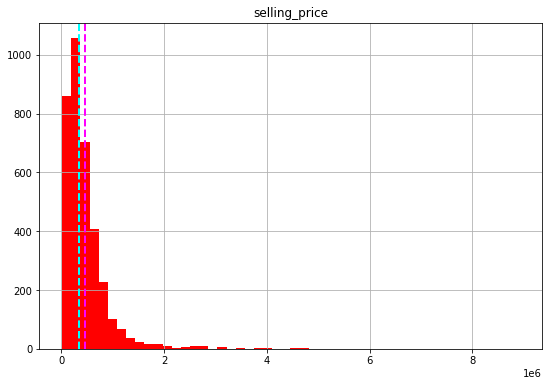

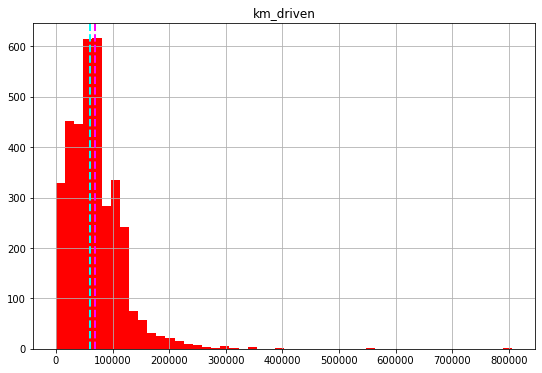

In [212]:
#Plot a bar plot for each numerical feature

for col in numeric_features[1:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins=50, ax = ax,color='r')
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()


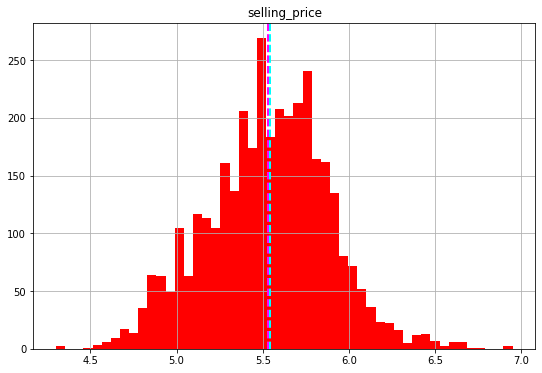

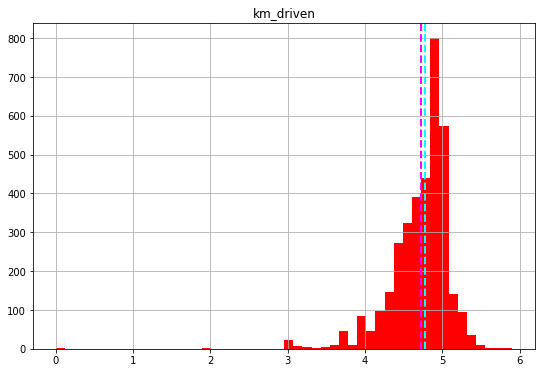

In [213]:
#Plot a bar plot for each numerical feature with log transformation

for col in numeric_features[1:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = np.log10(df[col])
  feature.hist(bins=50, ax = ax,color='r')
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

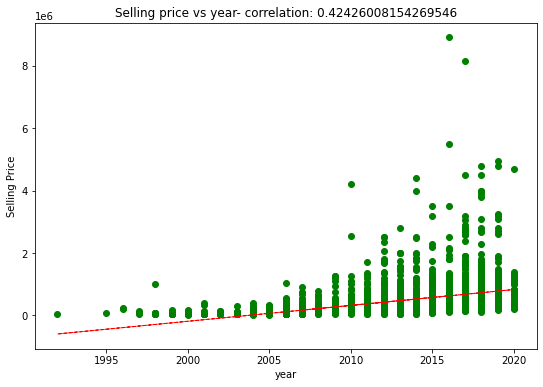

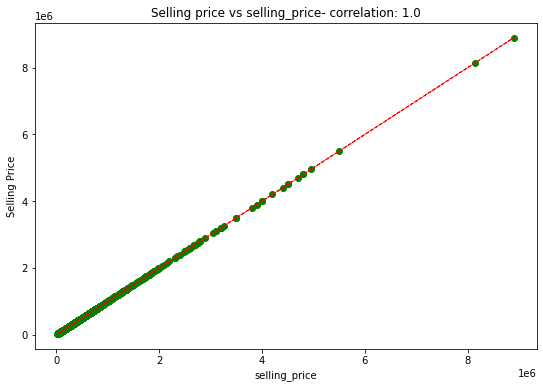

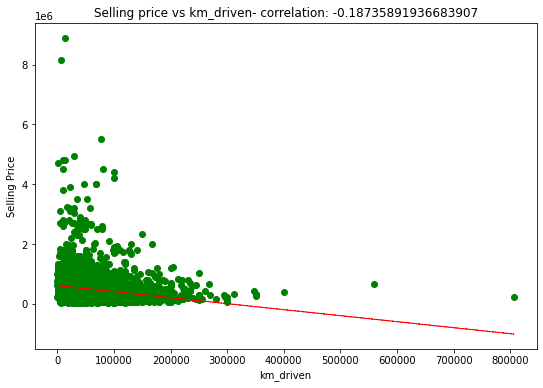

In [214]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label,color='g')
    plt.xlabel(col)
    plt.ylabel('Selling Price')
    ax.set_title('Selling price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['selling_price'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

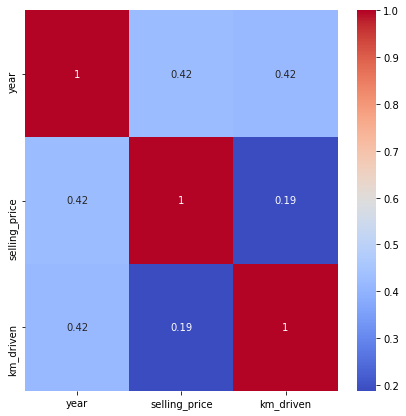

In [215]:
#Correlation
plt.figure(figsize=(7,7))
correlation= df.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

In [216]:
numeric_features=['year','selling_price','km_driven']

In [217]:
df['name'].unique().tolist()

['Maruti 800 AC',
 'Maruti Wagon R LXI Minor',
 'Hyundai Verna 1.6 SX',
 'Datsun RediGO T Option',
 'Honda Amaze VX i-DTEC',
 'Maruti Alto LX BSIII',
 'Hyundai Xcent 1.2 Kappa S',
 'Tata Indigo Grand Petrol',
 'Hyundai Creta 1.6 VTVT S',
 'Maruti Celerio Green VXI',
 'Chevrolet Sail 1.2 Base',
 'Toyota Corolla Altis 1.8 VL CVT',
 'Maruti Ciaz VXi Plus',
 'Hyundai Venue SX Opt Diesel',
 'Chevrolet Enjoy TCDi LTZ 7 Seater',
 'Jaguar XF 2.2 Litre Luxury',
 'Mercedes-Benz New C-Class 220 CDI AT',
 'Maruti Vitara Brezza ZDi Plus AMT',
 'Audi Q5 2.0 TDI',
 'Honda City V MT',
 'Tata Tigor 1.2 Revotron XT',
 'Audi A6 2.0 TDI  Design Edition',
 'Mercedes-Benz New C-Class C 220 CDI Avantgarde',
 'Skoda Superb Ambition 2.0 TDI CR AT',
 'Toyota Corolla Altis G AT',
 'Toyota Innova 2.5 G (Diesel) 7 Seater',
 'Jeep Compass 1.4 Sport Plus BSIV',
 'Mercedes-Benz E-Class E 200 CGI Elegance',
 'Hyundai i10 Magna 1.1L',
 'BMW 3 Series 320d Sport Line',
 'Audi Q7 35 TDI Quattro Premium',
 'Hyundai Elantra

In [218]:
 #extract first name from string and assign into new column company
 df['company'] = df['name'].str.split(" ",expand=True)[0]

In [219]:
#convert first letter to uppercase
df['company'] = df['company'].str.title()

In [220]:
#count of each value
df['company'].value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
Bmw                25
Mercedes-Benz      21
Jaguar              5
Land                5
Mitsubishi          5
Volvo               4
Ambassador          3
Jeep                3
Mg                  2
Opelcorsa           2
Isuzu               1
Force               1
Kia                 1
Daewoo              1
Name: company, dtype: int64

In [221]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [222]:
#extracting categorical feature
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

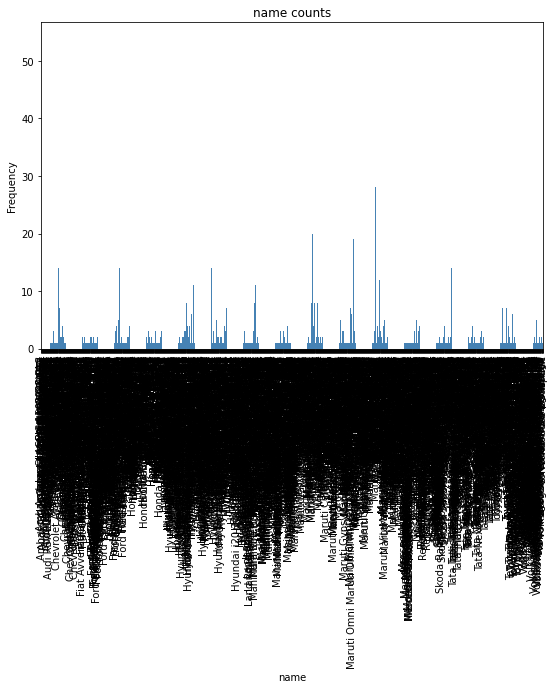

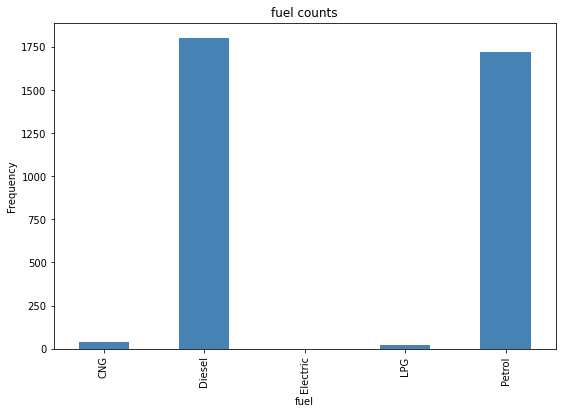

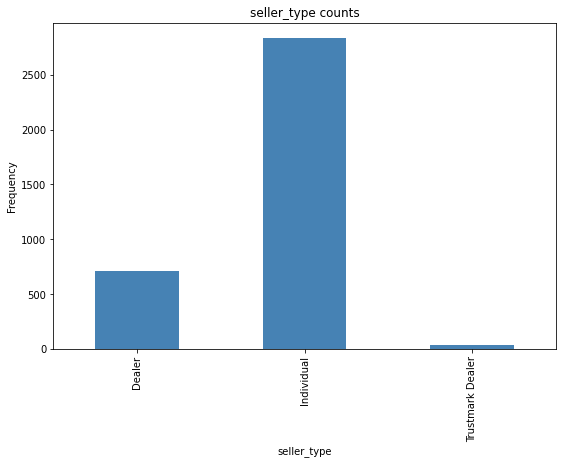

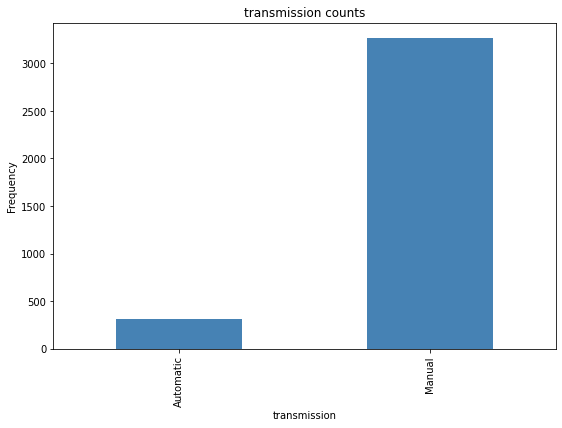

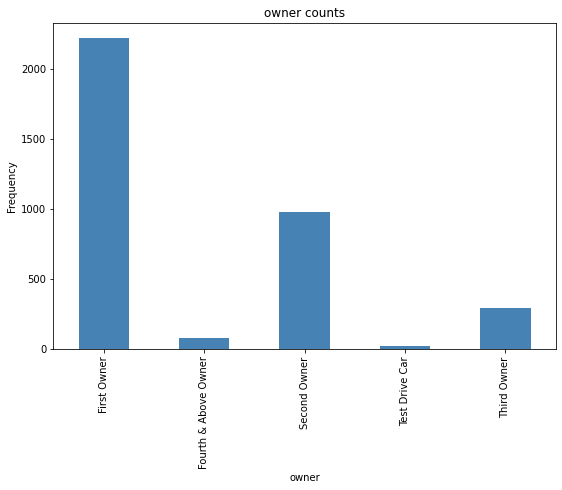

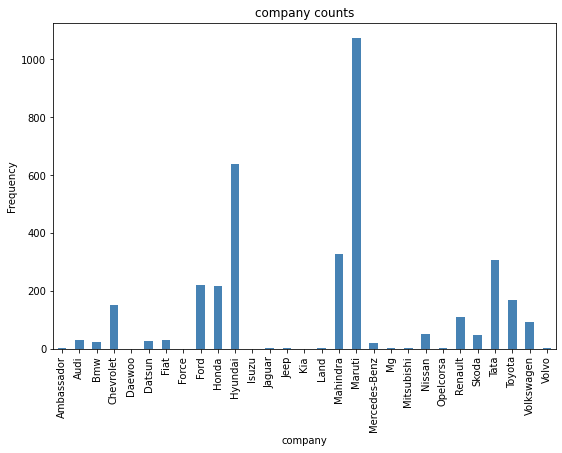

In [223]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

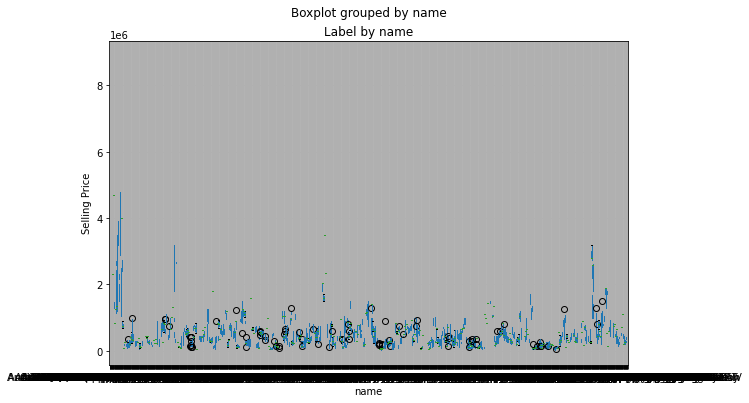

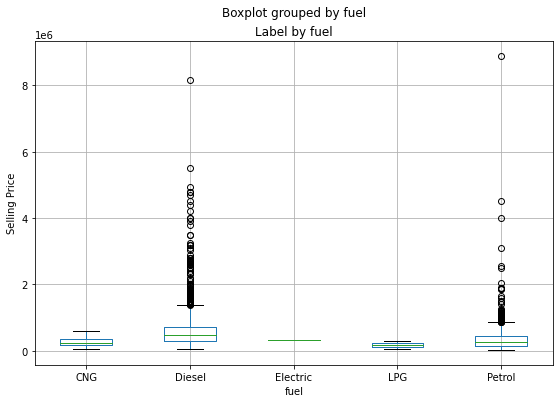

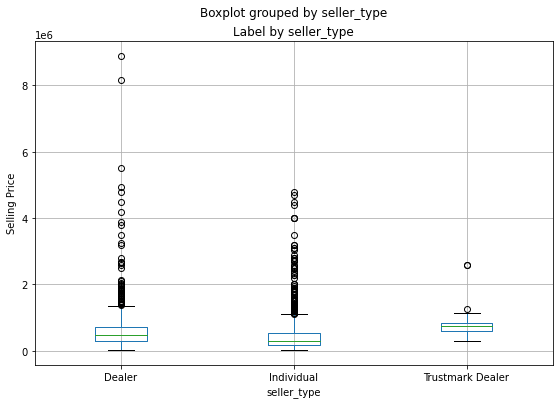

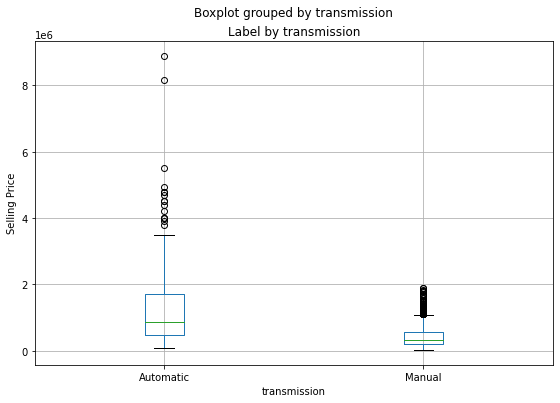

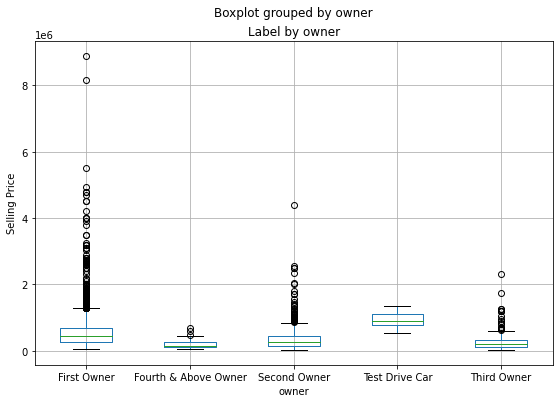

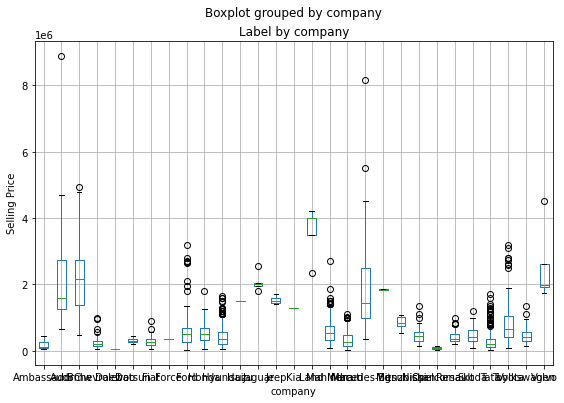

In [224]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Selling Price")
plt.show()

<Figure size 1440x432 with 0 Axes>

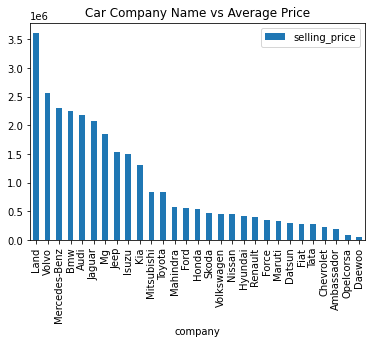

In [225]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [226]:
df_copy= df.copy()

In [227]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_copy[categorical_features]=ordinal_encoder.fit_transform(df_copy[categorical_features])

In [228]:
features=['year','km_driven','fuel','seller_type','transmission','owner','company']
features
 

['year',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'company']

In [229]:
from scipy.stats import zscore
X= df_copy[features].apply(zscore)

In [232]:
y= np.log10(df_copy['selling_price'])

In [236]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [248]:
X_train.shape,X_test.shape

((2861, 7), (716, 7))

In [251]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
reg = Regressor.fit(X_train,y_train)

In [253]:
reg.score(X_train,y_train)

0.6566698904104546

In [254]:
reg.coef_

array([ 0.21404329, -0.00672047, -0.10632742, -0.02716921, -0.09697801,
       -0.01363648, -0.008818  ])

In [255]:
len(reg.coef_)

7

In [262]:
 reg.intercept_

5.528105359708131

In [264]:
y_pred = reg.predict(X_test)
y_pred

array([5.18607461, 5.48375198, 5.87889198, 5.52986334, 5.63339341,
       5.67729891, 5.44248301, 5.37006681, 5.76110019, 4.89424263,
       5.8164482 , 5.55764726, 5.59211834, 5.36934046, 5.18696035,
       5.49778609, 6.00090101, 5.16734372, 5.80413256, 4.92486318,
       5.63868679, 5.25346257, 5.79873562, 5.62687215, 5.65955383,
       5.52986639, 5.25030035, 5.32923142, 5.54962551, 5.16734372,
       5.6958311 , 5.14118026, 5.90782333, 6.16731651, 5.60850515,
       5.59298361, 5.96563387, 5.32624179, 5.33129134, 5.57124587,
       5.6198863 , 5.77799756, 5.77722197, 5.24752954, 5.83603907,
       5.56368823, 5.54918025, 5.21549023, 5.15171732, 5.22690283,
       5.78413582, 5.86826173, 6.06767739, 5.79270713, 5.84821431,
       6.17173698, 5.43695387, 5.32042686, 5.23135807, 6.29351003,
       5.80700373, 5.43471341, 5.47695588, 5.4289759 , 5.81303888,
       5.0689858 , 5.37357538, 5.929258  , 5.20098395, 5.27172513,
       5.14488694, 5.67219041, 5.22468195, 5.47443444, 5.54388

In [275]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(10**(y_test), 10**(y_pred))
print('MSE:', MSE)

RMSE = np.sqrt(MSE)
print('RMSE:',RMSE)

MSE: 99149729226.38828
RMSE: 314880.49991447275


In [ ]:
1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [277]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test),10**(y_pred))
print('R2:', r2)

print('adjusted R2',1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2: 0.5160830468704913
adjusted R2 0.5112985572209058


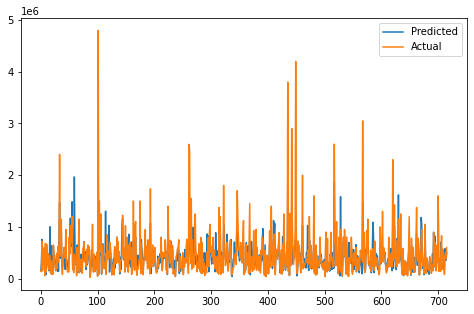

In [278]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [280]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [281]:
lasso.score(X_train, y_train)

0.65666948088305

In [283]:
lasso.coef_

array([ 0.21405128, -0.00660954, -0.10618137, -0.0271158 , -0.09690816,
       -0.01357933, -0.00872512])

In [284]:
lasso.intercept_

5.528102157947121